# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

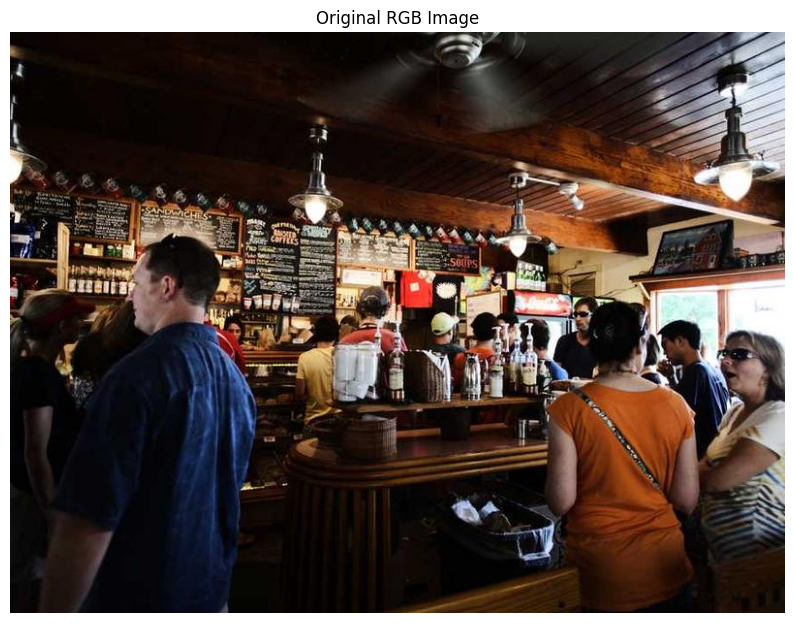

Successfully loaded and displayed image from: https://picsum.photos/800/600


In [14]:
import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

image_url = 'https://picsum.photos/800/600'
response = requests.get(image_url)

# Check if the request was successful
if response.status_code == 200:
    img_data = io.BytesIO(response.content)
    img = Image.open(img_data)

    # 4. Convert the PIL Image object to a NumPy array.
    img_np = np.array(img)

    # 5. Display the RGB image using matplotlib.pyplot.imshow().
    plt.figure(figsize=(10, 8))
    plt.imshow(img_np)
    plt.title('Original RGB Image')
    plt.axis('off')
    plt.show()

    print(f"Successfully loaded and displayed image from: {image_url}")
else:
    print(f"Failed to fetch image from {image_url}. Status code: {response.status_code}")


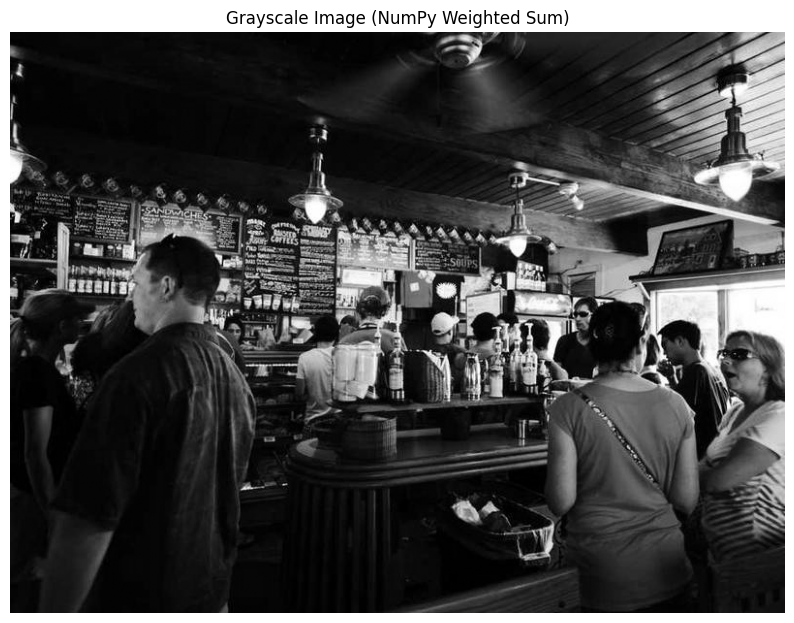

Grayscale image converted using NumPy and displayed.


In [15]:
import cv2
grayscale_np = np.dot(img_np[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# Display the grayscale image converted with NumPy
plt.figure(figsize=(10, 8))
plt.imshow(grayscale_np, cmap='gray')
plt.title('Grayscale Image (NumPy Weighted Sum)')
plt.axis('off')
plt.show()

print("Grayscale image converted using NumPy and displayed.")


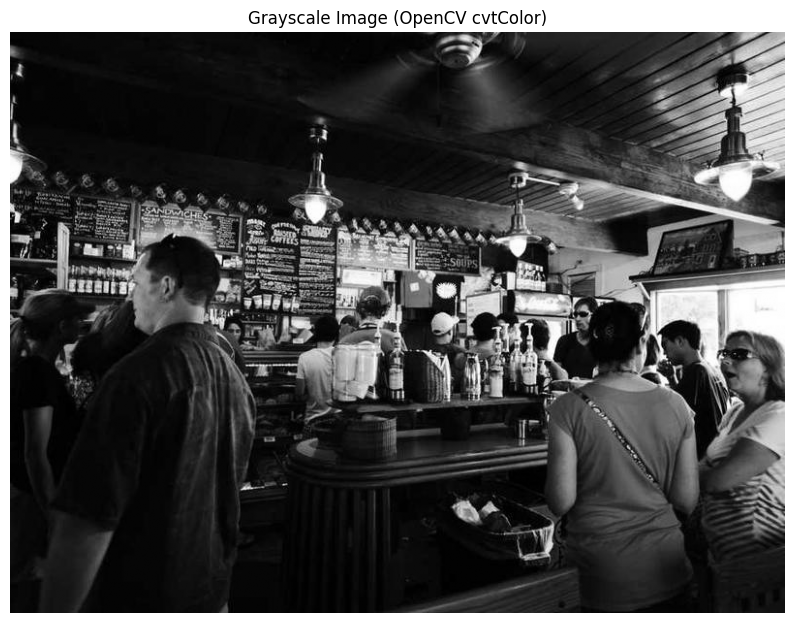

Grayscale image converted using OpenCV's cvtColor and displayed.


In [16]:
import cv2 # cv2 was already imported in the previous step, but explicitly importing it again for clarity in this new step.

# Convert to grayscale using cvtColor function
grayscale_cv = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# Display the grayscale image converted with cvtColor
plt.figure(figsize=(10, 8))
plt.imshow(grayscale_cv, cmap='gray')
plt.title('Grayscale Image (OpenCV cvtColor)')
plt.axis('off')
plt.show()

print("Grayscale image converted using OpenCV's cvtColor and displayed.")

In [19]:
import numpy as np

# 3. Compare results (NumPy vs. cvtColor)
# Calculate the mean absolute difference between the two grayscale images
difference = np.abs(grayscale_np.astype(np.int32) - grayscale_cv.astype(np.int32))
mean_abs_difference = np.mean(difference)

print(f"Mean Absolute Difference between NumPy and OpenCV grayscale images: {mean_abs_difference:.4f}")

# 4. Print the array shapes of both the RGB and grayscale images
print(f"\nShape of Original RGB Image: {img_np.shape}")
print(f"Shape of NumPy Grayscale Image: {grayscale_np.shape}")
print(f"Shape of OpenCV Grayscale Image: {grayscale_cv.shape}")

# 5. Print a few pixel values of both
print("\nSample Pixel Values:")
print("Original RGB Image (top-left 2x2 pixels):")
print(img_np[:2, :2, :])

print("\nNumPy Grayscale Image (top-left 2x2 pixels):")
print(grayscale_np[:2, :2])

print("\nOpenCV Grayscale Image (top-left 2x2 pixels):")
print(grayscale_cv[:2, :2])

Mean Absolute Difference between NumPy and OpenCV grayscale images: 0.5438

Shape of Original RGB Image: (600, 800, 3)
Shape of NumPy Grayscale Image: (600, 800)
Shape of OpenCV Grayscale Image: (600, 800)

Sample Pixel Values:
Original RGB Image (top-left 2x2 pixels):
[[[ 9  4 10]
  [ 9  4 10]]

 [[ 9  4 10]
  [ 9  4 10]]]

NumPy Grayscale Image (top-left 2x2 pixels):
[[6 6]
 [6 6]]

OpenCV Grayscale Image (top-left 2x2 pixels):
[[6 6]
 [6 6]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

Proceeding with Part B...


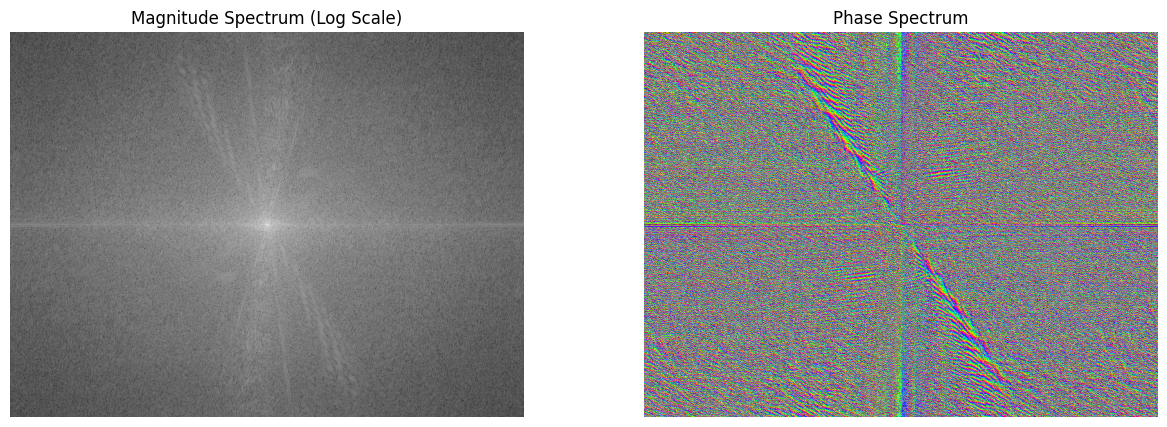

Shape of fshift (FFT output): (600, 800)
Shape of magnitude_spectrum: (600, 800)
Shape of phase_spectrum: (600, 800)


In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
if 'grayscale_cv' not in locals():
    print("Error: 'grayscale_cv' not found. Please run Part A code first.")
else:
    print("Proceeding with Part B...")

    # B1. Compute the FFT of the grayscale image (use NumPy)
    # 1. np.fft.fft2: Compute the 2-D discrete Fourier Transform.
    f = np.fft.fft2(grayscale_cv)

    # 2. np.fft.fftshift: Shift the zero-frequency component to the center of the spectrum.
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    # Compute the phase spectrum
    phase_spectrum = np.angle(fshift)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Log Scale)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(phase_spectrum, cmap='hsv') # 'hsv' colormap is often used for phase to show cyclic nature
    plt.title('Phase Spectrum')
    plt.axis('off')
    plt.show()
    print(f"Shape of fshift (FFT output): {fshift.shape}")
    print(f"Shape of magnitude_spectrum: {magnitude_spectrum.shape}")
    print(f"Shape of phase_spectrum: {phase_spectrum.shape}")

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

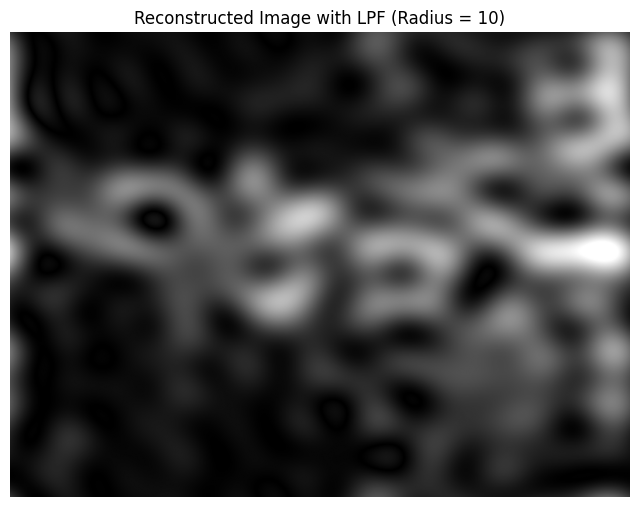

Reconstructed image with LPF (Radius 10) displayed. Expected a strong blur.


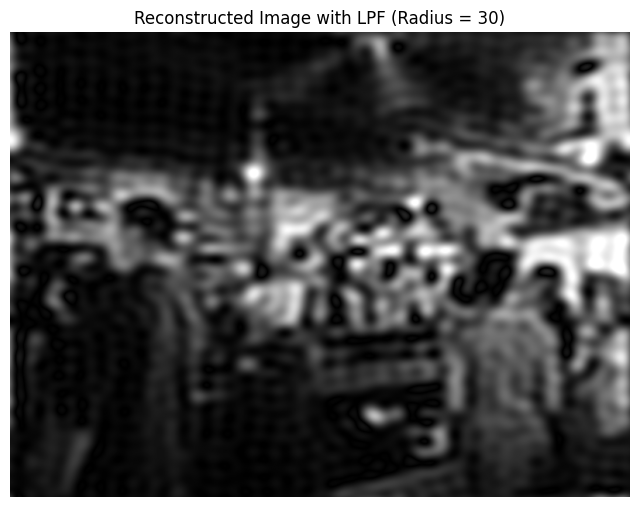

Reconstructed image with LPF (Radius 30) displayed. Expected less blur than radius 10.


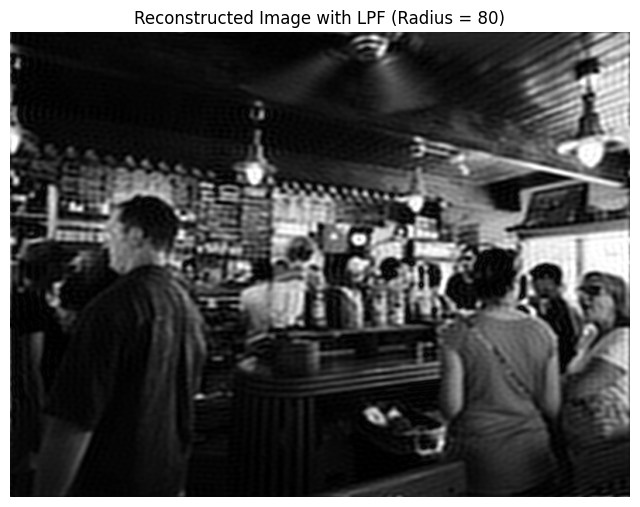

Reconstructed image with LPF (Radius 80) displayed. Expected even less blur than radius 30.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define a function to create a circular Low-Pass Filter (LPF) mask
def create_circular_lpf_mask(shape, radius):
    """
    Creates a circular Low-Pass Filter (LPF) mask.

    Args:
        shape (tuple): A tuple (rows, cols) representing the dimensions of the mask.
        radius (int): The radius of the circular filter.

    Returns:
        numpy.ndarray: A 2D numpy array representing the circular LPF mask.
    """
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    # Generate coordinates relative to the center
    y = np.arange(rows) - crow
    x = np.arange(cols) - ccol
    X, Y = np.meshgrid(x, y)

    # Calculate the Euclidean distance of each point from the center
    distance = np.sqrt(X**2 + Y**2)

    # Create a mask where values are 1 if the distance is <= radius, and 0 otherwise
    mask = np.zeros(shape, dtype=np.float64)
    mask[distance <= radius] = 1
    return mask

# 2. Get the height and width of the grayscale image
rows, cols = grayscale_cv.shape

# 3. Call the create_circular_lpf_mask function with a radius of 10
radius_10 = 10
lpf_mask_10 = create_circular_lpf_mask((rows, cols), radius_10)

# 4. Apply the LPF mask to the fshift (shifted FFT) of the grayscale image
# Element-wise multiplication in the frequency domain performs filtering.
masked_fshift_10 = fshift * lpf_mask_10

# 5. Perform the inverse Fourier transform
# a. Apply np.fft.ifftshift to the masked frequency spectrum
ifftshift_masked_10 = np.fft.ifftshift(masked_fshift_10)

# b. Apply np.fft.ifft2 to the result from the previous step
# This brings the image back to the spatial domain.
reconstructed_image_10_complex = np.fft.ifft2(ifftshift_masked_10)

# c. Take the real part of the resulting complex array and ensure its values are within 0-255
# The real part represents the actual image intensity; imaginary parts are due to numerical errors.
reconstructed_image_10 = np.abs(reconstructed_image_10_complex)
reconstructed_image_10 = np.clip(reconstructed_image_10, 0, 255).astype(np.uint8)

# 6. Display the reconstructed image
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image_10, cmap='gray')
# 7. Add a descriptive title to the plot
plt.title(f'Reconstructed Image with LPF (Radius = {radius_10})')
plt.axis('off')
plt.show()

print(f"Reconstructed image with LPF (Radius {radius_10}) displayed. Expected a strong blur.")


import numpy as np
import matplotlib.pyplot as plt

# The create_circular_lpf_mask function is already defined in the previous step.
# Re-using the previously defined function.

# 1. Call the create_circular_lpf_mask function with a radius of 30
radius_30 = 30
lpf_mask_30 = create_circular_lpf_mask((rows, cols), radius_30)

# 2. Apply the LPF mask to the fshift (shifted FFT) of the grayscale image
masked_fshift_30 = fshift * lpf_mask_30

# 3. Perform the inverse Fourier transform
# a. Apply np.fft.ifftshift to the masked frequency spectrum
ifftshift_masked_30 = np.fft.ifftshift(masked_fshift_30)

# b. Apply np.fft.ifft2 to the result from the previous step
reconstructed_image_30_complex = np.fft.ifft2(ifftshift_masked_30)

# c. Take the real part and ensure its values are within 0-255
reconstructed_image_30 = np.abs(reconstructed_image_30_complex)
reconstructed_image_30 = np.clip(reconstructed_image_30, 0, 255).astype(np.uint8)

# 4. Display the reconstructed image
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image_30, cmap='gray')
plt.title(f'Reconstructed Image with LPF (Radius = {radius_30})')
plt.axis('off')
plt.show()

print(f"Reconstructed image with LPF (Radius {radius_30}) displayed. Expected less blur than radius 10.")


import numpy as np
import matplotlib.pyplot as plt

# The create_circular_lpf_mask function is already defined.
# Re-using the previously defined function.

# 1. Call the create_circular_lpf_mask function with a radius of 80
radius_80 = 80
lpf_mask_80 = create_circular_lpf_mask((rows, cols), radius_80)

# 2. Apply the LPF mask to the fshift (shifted FFT) of the grayscale image
masked_fshift_80 = fshift * lpf_mask_80

# 3. Perform the inverse Fourier transform
# a. Apply np.fft.ifftshift to the masked frequency spectrum
ifftshift_masked_80 = np.fft.ifftshift(masked_fshift_80)

# b. Apply np.fft.ifft2 to the result from the previous step
reconstructed_image_80_complex = np.fft.ifft2(ifftshift_masked_80)

# c. Take the real part and ensure its values are within 0-255
reconstructed_image_80 = np.abs(reconstructed_image_80_complex)
reconstructed_image_80 = np.clip(reconstructed_image_80, 0, 255).astype(np.uint8)

# 4. Display the reconstructed image
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image_80, cmap='gray')
plt.title(f'Reconstructed Image with LPF (Radius = {radius_80})')
plt.axis('off')
plt.show()

print(f"Reconstructed image with LPF (Radius {radius_80}) displayed. Expected even less blur than radius 30.")





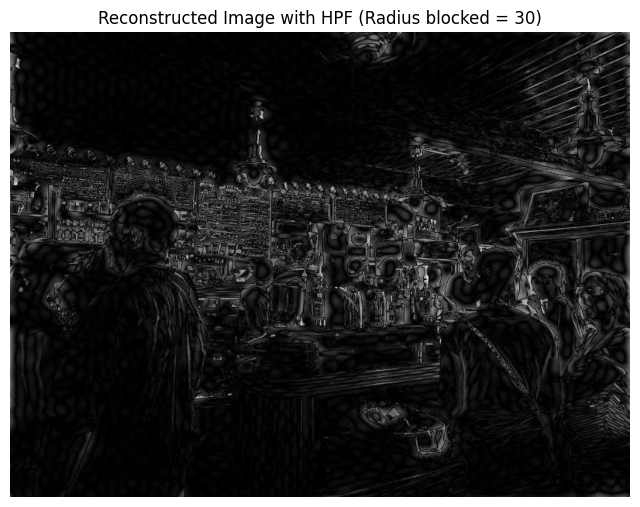

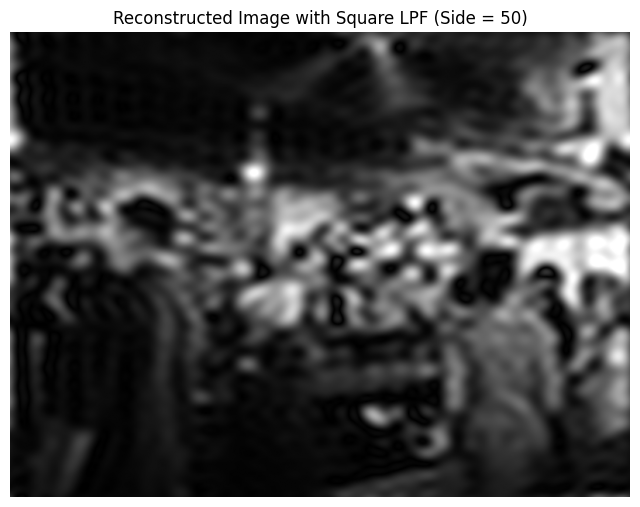

In [28]:
import numpy as np
import matplotlib.pyplot as plt

lpf_mask_hpf_base = create_circular_lpf_mask((rows, cols), radius_hpf_base)

# 2. Create the HPF mask by taking the complement of the LPF mask
# This means 1 - LPF_mask. Where the LPF mask was 1 (passing low frequencies), the HPF mask will be 0 (blocking them).
# Where the LPF mask was 0 (blocking high frequencies), the HPF mask will be 1 (passing them).
hpf_mask = 1 - lpf_mask_hpf_base

# 3. Apply the HPF mask to the fshift (shifted FFT) of the grayscale image
masked_fshift_hpf = fshift * hpf_mask

# 4. Perform the inverse Fourier transform
# a. Apply np.fft.ifftshift to the masked frequency spectrum
ifftshift_masked_hpf = np.fft.ifftshift(masked_fshift_hpf)

# b. Apply np.fft.ifft2 to the result from the previous step
reconstructed_image_hpf_complex = np.fft.ifft2(ifftshift_masked_hpf)

# c. Take the real part and ensure its values are within 0-255
# Note: HPF images can have negative values and values > 255 before clipping.
# It's often good practice to normalize before clipping for display if the range is far off.
reconstructed_image_hpf = np.abs(reconstructed_image_hpf_complex)
reconstructed_image_hpf = np.clip(reconstructed_image_hpf, 0, 255).astype(np.uint8)

# 5. Display the reconstructed image
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image_hpf, cmap='gray')
plt.title(f'Reconstructed Image with HPF (Radius blocked = {radius_hpf_base})')
plt.axis('off')
plt.show()


import numpy as np
import matplotlib.pyplot as plt

# 1. Define a function to create a square Low-Pass Filter (LPF) mask
def create_square_lpf_mask(shape, side_length):
    """
    Creates a square Low-Pass Filter (LPF) mask.

    Args:
        shape (tuple): A tuple (rows, cols) representing the dimensions of the mask.
        side_length (int): The side length of the square filter.

    Returns:
        numpy.ndarray: A 2D numpy array representing the square LPF mask.
    """
    rows, cols = shape
    mask = np.zeros(shape, dtype=np.float64)

    # Calculate the coordinates of the center of the frequency domain
    crow, ccol = rows // 2, cols // 2

    # Determine the half-side length
    half_side = side_length // 2

    # Define the boundaries of the square mask
    # Ensure the boundaries are within the image dimensions
    row_start = max(0, crow - half_side)
    row_end = min(rows, crow + half_side + (side_length % 2)) # +1 if side_length is odd
    col_start = max(0, ccol - half_side)
    col_end = min(cols, ccol + half_side + (side_length % 2)) # +1 if side_length is odd

    # Set the region within the square to 1
    mask[row_start:row_end, col_start:col_end] = 1
    return mask

# 2. Get the height and width of the grayscale image
rows, cols = grayscale_cv.shape

# 3. Call the create_square_lpf_mask function with a side length of 50
side_length_50 = 50
square_lpf_mask = create_square_lpf_mask((rows, cols), side_length_50)

# 4. Apply the square LPF mask to the fshift (shifted FFT) of the grayscale image
masked_fshift_square_lpf = fshift * square_lpf_mask

# 5. Perform the inverse Fourier transform
# a. Apply np.fft.ifftshift to the masked frequency spectrum
ifftshift_masked_square_lpf = np.fft.ifftshift(masked_fshift_square_lpf)

# b. Apply np.fft.ifft2 to the result from the previous step
reconstructed_image_square_lpf_complex = np.fft.ifft2(ifftshift_masked_square_lpf)

# c. Take the real part and ensure its values are within 0-255
reconstructed_image_square_lpf = np.abs(reconstructed_image_square_lpf_complex)
reconstructed_image_square_lpf = np.clip(reconstructed_image_square_lpf, 0, 255).astype(np.uint8)

# 6. Display the reconstructed image
plt.figure(figsize=(8, 8))
plt.imshow(reconstructed_image_square_lpf, cmap='gray')
plt.title(f'Reconstructed Image with Square LPF (Side = {side_length_50})')
plt.axis('off')
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

Proceeding with Part D1...


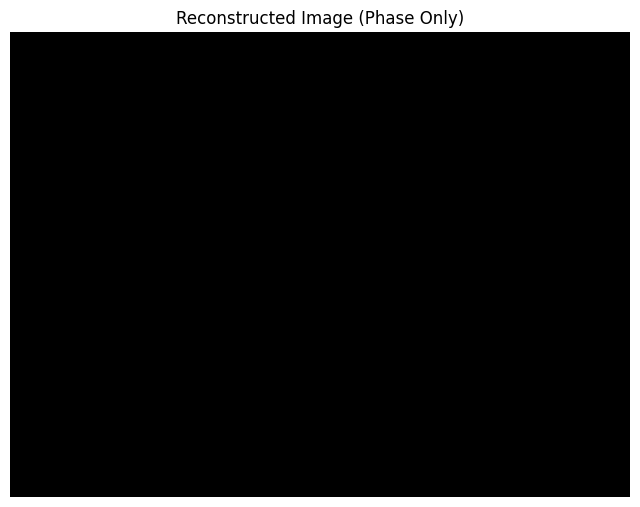

Image reconstructed from phase-only spectrum displayed.


In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure fshift and phase_spectrum are available from previous steps
if 'fshift' not in locals() or 'phase_spectrum' not in locals():
    print("Error: 'fshift' or 'phase_spectrum' not found. Please run Part B code first.")
else:
    print("Proceeding with Part D1...")



    phase_only_spectrum = fshift / (np.abs(fshift) + 1e-10) # Add a small epsilon to avoid division by zero

    # 2. Reconstruct the image from the phase_only_spectrum
    # a. Apply np.fft.ifftshift
    ifftshift_phase_only = np.fft.ifftshift(phase_only_spectrum)

    # b. Apply np.fft.ifft2 to get the complex reconstructed image
    reconstructed_image_phase_only_complex = np.fft.ifft2(ifftshift_phase_only)

    # c. Take the absolute value and convert to uint8, clipping values
    # The absolute value is taken because the result of IFFT is generally complex,
    # but image intensities are real and non-negative. Abs ensures non-negativity.
    reconstructed_image_phase_only = np.abs(reconstructed_image_phase_only_complex)
    reconstructed_image_phase_only = np.clip(reconstructed_image_phase_only, 0, 255).astype(np.uint8)

    # 3. Display the reconstructed image
    plt.figure(figsize=(8, 8))
    plt.imshow(reconstructed_image_phase_only, cmap='gray')
    plt.title('Reconstructed Image (Phase Only)')
    plt.axis('off')
    plt.show()
    print("Image reconstructed from phase-only spectrum displayed.")



Proceeding with Part D2...


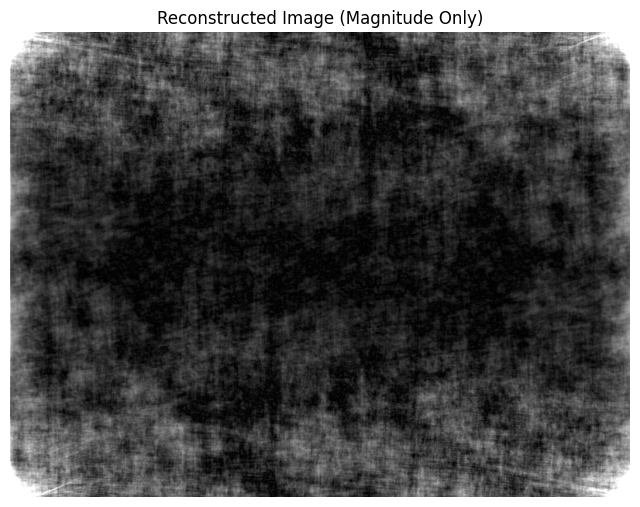

Image reconstructed from magnitude-only spectrum displayed.


In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure fshift is available from previous steps
if 'fshift' not in locals():
    print("Error: 'fshift' not found. Please run Part B code first.")
else:
    print("Proceeding with Part D2...")

    # D2. Magnitude-only reconstruction

    # 1. Calculate the magnitude-only spectrum
    mag_only = np.abs(fshift)

    # 2. Create a complex spectrum by treating this mag_only as the real part and setting the imaginary part to zero.
    # This simulates a magnitude-only spectrum with zero phase for all frequencies.
    # Mathematically, this is equivalent to mag_only * np.exp(1j * 0) = mag_only * (cos(0) + i*sin(0)) = mag_only * (1 + 0j) = mag_only + 0j.
    magnitude_only_complex_spectrum = mag_only + 0j

    # 3. Apply np.fft.ifftshift to this complex magnitude-only spectrum.
    ifftshift_magnitude_only = np.fft.ifftshift(magnitude_only_complex_spectrum)

    # 4. Apply np.fft.ifft2 to perform the inverse Fourier transform.
    reconstructed_image_magnitude_only_complex = np.fft.ifft2(ifftshift_magnitude_only)

    # 5. Take the absolute value of the complex result and clip the values to 0-255, then convert to uint8.
    # The absolute value is used as image intensities are real and non-negative. Clipping is for display purposes.
    reconstructed_image_magnitude_only = np.abs(reconstructed_image_magnitude_only_complex)
    reconstructed_image_magnitude_only = np.clip(reconstructed_image_magnitude_only, 0, 255).astype(np.uint8)

    # 6. Display the reconstructed image
    plt.figure(figsize=(8, 8))
    plt.imshow(reconstructed_image_magnitude_only, cmap='gray')
    plt.title('Reconstructed Image (Magnitude Only)')
    plt.axis('off')
    plt.show()
    print("Image reconstructed from magnitude-only spectrum displayed.")



## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

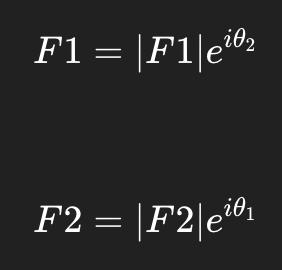

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.